# Pymaceuticals Inc.
---

### Analysis
- Mice treated with Capomulin and Ramicane had smaller tumors compared to other treatments
- Of the drugs included in the quartile calculations only Infubinol had an outlier. 
- As the mice grew, their tumors grew at a corresponding rate (.84)

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
overall_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
overall_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
overall_df["Mouse ID"].nunique()


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates_df = overall_df[overall_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicates_df['Mouse ID'].unique()


array(['g989'], dtype=object)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = overall_df.loc[overall_df['Mouse ID'] != "g989"]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})

summary_df.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

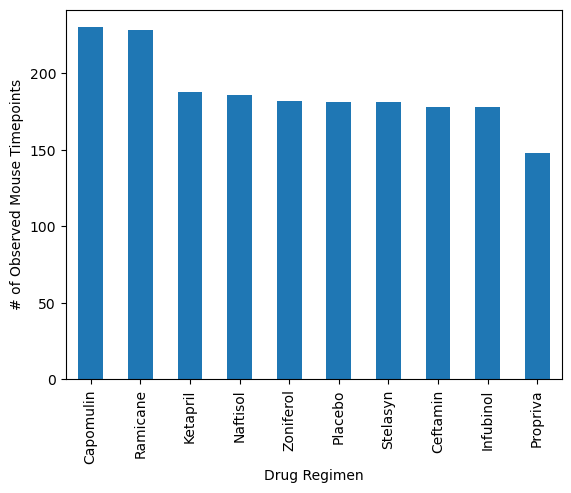

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = cleaned_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
total_rows.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")

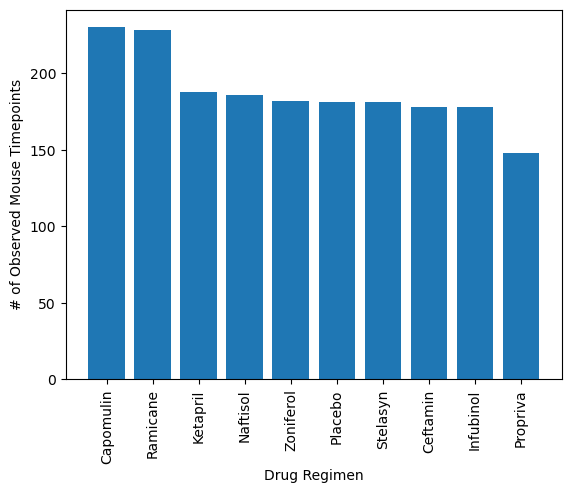

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(total_rows.index, total_rows.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

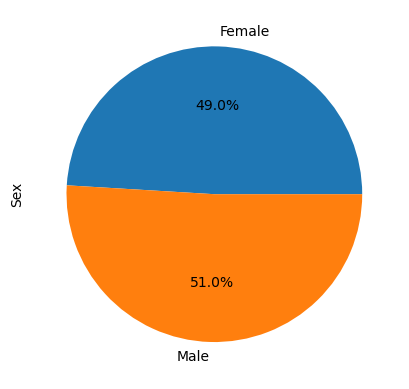

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = cleaned_df.groupby("Sex")["Mouse ID"].count()
gender_df.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")

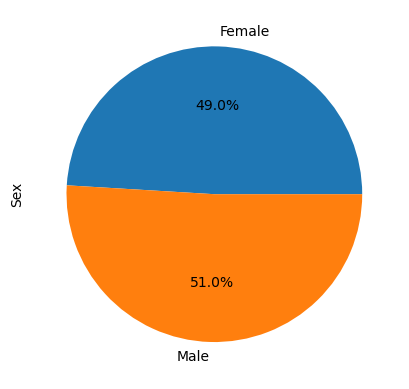

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df.values, labels=gender_df.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, cleaned_df, on=["Mouse ID", "Timepoint"])
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_df = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol.append(temp_df)

    # Determine outliers using upper and lower bounds
    quartiles = temp_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = temp_df.loc[(temp_df < lower_bound) | (temp_df > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


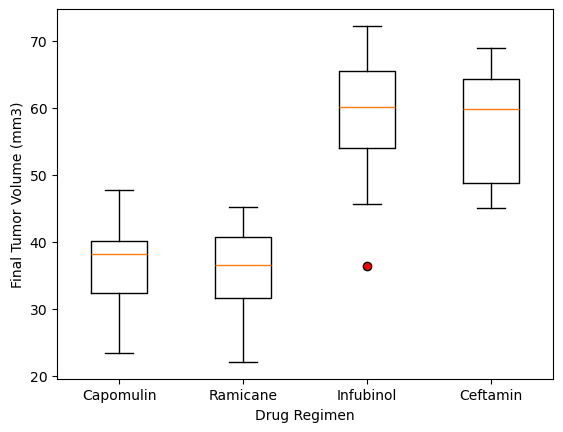

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red')
img1 = plt.boxplot(tumor_vol, labels=drug_list, flierprops=flierprops)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
cap_df['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

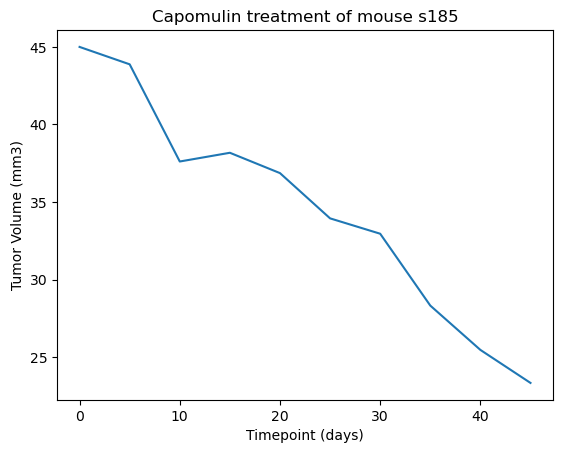

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = cap_df.loc[cap_df["Mouse ID"] == "s185"]
img2 = plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


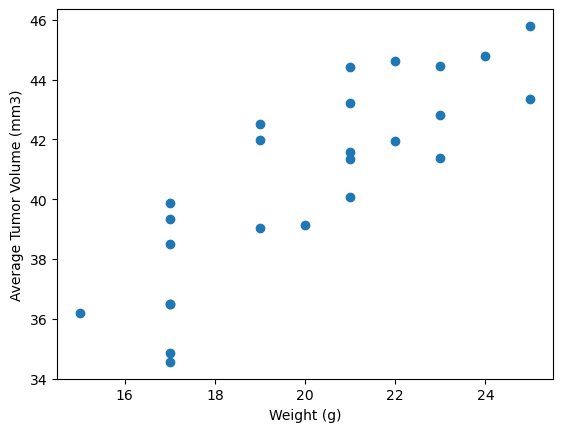

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_cap_df = cap_df.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean()

img3 = plt.scatter(avg_cap_df["Weight (g)"], avg_cap_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


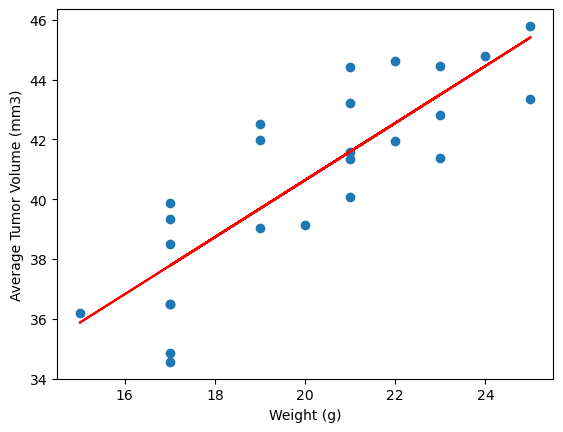

In [20]:
from sys import stderr
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr_coef = st.pearsonr(avg_cap_df["Weight (g)"], avg_cap_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coef[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_cap_df["Weight (g)"], avg_cap_df["Tumor Volume (mm3)"])
reg_vals = avg_cap_df["Weight (g)"] * slope + intercept
line1 = f"y = {round(slope,2)}x + {round(intercept,2)}"

img4 = plt.scatter(avg_cap_df["Weight (g)"], avg_cap_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(avg_cap_df["Weight (g)"],reg_vals,"r-")
plt.show()
